In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics as sklm 

In [2]:
data = pd.read_csv('Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
data.head

<bound method NDFrame.head of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor      

In [4]:
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [5]:
data.shape

(9134, 24)

In [6]:
print('Response: '+ str(data['Response'].unique()))
print('Coverage: '+ str(data['Coverage'].unique()))
print('Education: '+ str(data['Education'].unique()))
print('Employment Status: '+ str(data['EmploymentStatus'].unique()))
print('Gender: ' + str(data['Gender'].unique()))
print('Location Code: ' + str(data['Location Code'].unique()))
print('Married: ' + str(data['Marital Status'].unique()))
print('Policy Type: ' + str(data['Policy Type'].unique()))
print('Vehicle Size: ' + str(data['Vehicle Size'].unique()))

Response: ['No' 'Yes']
Coverage: ['Basic' 'Extended' 'Premium']
Education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Employment Status: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender: ['F' 'M']
Location Code: ['Suburban' 'Rural' 'Urban']
Married: ['Married' 'Single' 'Divorced']
Policy Type: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Vehicle Size: ['Medsize' 'Small' 'Large']


# Customer Lifetime value

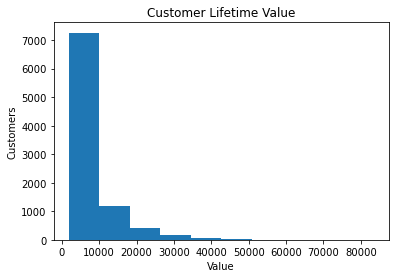

In [7]:
plt.hist(data['Customer Lifetime Value'], bins = 10)
plt.title("Customer Lifetime Value") 
plt.xlabel("Value")  
plt.ylabel("Customers")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd9adcecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd9ade1370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd9adcea00>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd9ade1850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd9ade1b20>],
 'means': []}

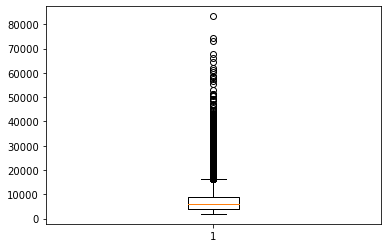

In [8]:
plt.boxplot(data['Customer Lifetime Value'])

In [9]:
outliers = data[data['Customer Lifetime Value'] > 50000]
outliers.head(25)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
79,OM82309,California,58166.55351,No,Basic,Bachelor,2/27/11,Employed,M,61321,...,30,1,2,Personal Auto,Personal L3,Offer2,Branch,427.631210,Luxury Car,Small
1974,YC54142,Washington,74228.51604,No,Extended,High School or Below,1/26/11,Unemployed,M,0,...,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.400000,Luxury Car,Medsize
2190,KI58952,California,51337.90677,No,Premium,College,2/24/11,Employed,F,72794,...,47,1,2,Personal Auto,Personal L2,Offer1,Web,50.454459,SUV,Large
2908,EN65835,Arizona,58753.88046,No,Premium,Bachelor,1/6/11,Employed,F,24964,...,84,0,2,Personal Auto,Personal L2,Offer2,Agent,888.000000,SUV,Medsize
3145,CL79250,Nevada,52811.49112,No,Basic,Bachelor,1/8/11,Unemployed,M,0,...,70,0,2,Corporate Auto,Corporate L2,Offer2,Agent,873.600000,Luxury Car,Small
3760,AZ84403,Oregon,61850.18803,No,Extended,College,2/4/11,Unemployed,F,0,...,29,0,2,Personal Auto,Personal L1,Offer3,Branch,1142.400000,Luxury SUV,Medsize
4126,JT47995,Arizona,60556.19213,No,Extended,College,1/1/11,Unemployed,F,0,...,45,0,2,Personal Auto,Personal L3,Offer1,Web,979.200000,Luxury SUV,Large
4915,DU50092,Oregon,56675.93768,No,Premium,College,1/24/11,Employed,F,77237,...,93,0,2,Personal Auto,Personal L1,Offer4,Web,1358.400000,Luxury SUV,Medsize
5279,SK66747,Washington,66025.75407,No,Basic,Bachelor,2/22/11,Employed,M,33481,...,46,0,2,Personal Auto,Personal L3,Offer1,Agent,1194.892002,Luxury SUV,Medsize
5716,FQ61281,Oregon,83325.38119,No,Extended,High School or Below,1/31/11,Employed,M,58958,...,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1108.800000,Luxury Car,Small


In [10]:
data.isnull().sum().sort_values(ascending = False)

Customer                         0
State                            0
Vehicle Class                    0
Total Claim Amount               0
Sales Channel                    0
Renew Offer Type                 0
Policy                           0
Policy Type                      0
Number of Policies               0
Number of Open Complaints        0
Months Since Policy Inception    0
Months Since Last Claim          0
Monthly Premium Auto             0
Marital Status                   0
Location Code                    0
Income                           0
Gender                           0
EmploymentStatus                 0
Effective To Date                0
Education                        0
Coverage                         0
Response                         0
Customer Lifetime Value          0
Vehicle Size                     0
dtype: int64

In [11]:
data = data.drop(labels = ['Customer'], axis =  1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
column_names = ['Response', 'Coverage', 'Education', 
                     'Effective To Date', 'EmploymentStatus', 
                     'Gender', 'Location Code', 'Marital Status',
                     'Policy Type', 'Policy', 'Renew Offer Type',
                     'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'State']

for col in column_names:
    data[col] = le.fit_transform(data[col])
    
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,47,1,0,56274,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,24,4,0,0,1,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,41,1,0,48767,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,12,4,1,0,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,52,1,1,43836,0,...,44,0,1,1,3,0,0,138.130879,0,1


In [14]:
y = data['Customer Lifetime Value'] 
X = data.drop(labels = ['Customer Lifetime Value'], axis = 1) 

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

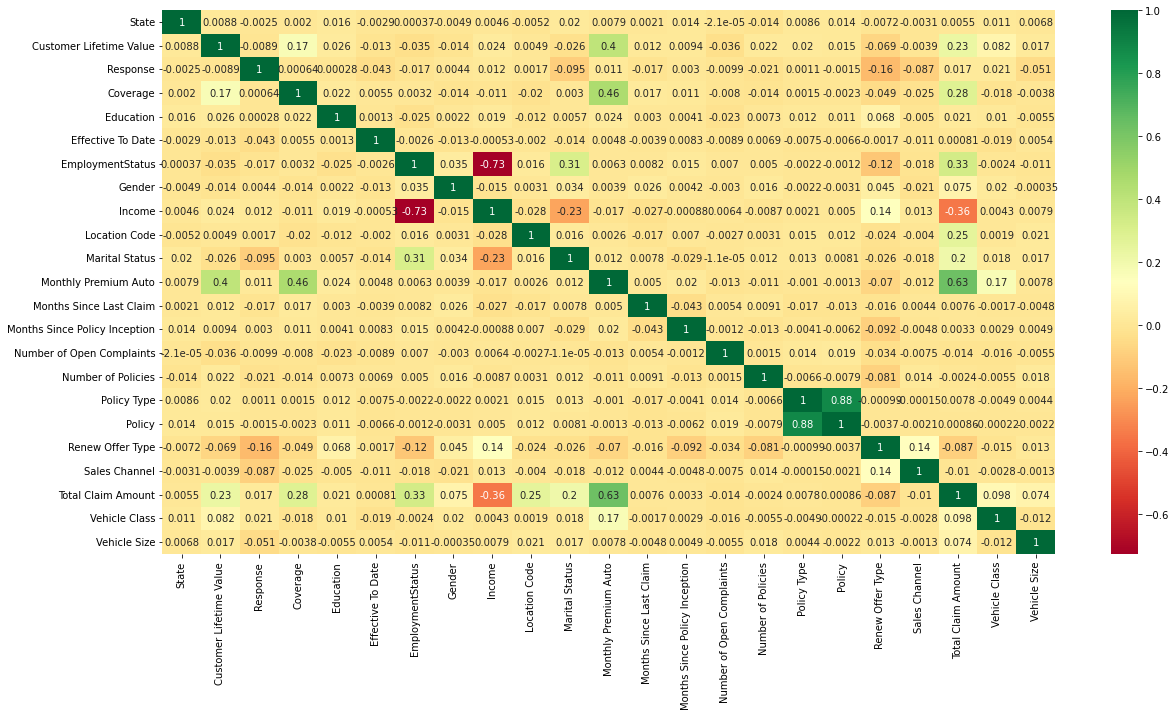

In [18]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Machine learning model 

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.model_selection import train_test_split

#First try with the 5 most important features
X_5 = data[['Total Claim Amount', 'Monthly Premium Auto', 'Income', 'Coverage', 'Months Since Policy Inception']] #independent columns chosen 
y = data['Customer Lifetime Value']    #target column 

#I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_5,y, test_size=0.3 , random_state = 25)

In [21]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (6393, 5)
Shape of X_test is:  (2741, 5)
Shape of Y_train is:  (6393,)
Shape of y_test is:  (2741,)


In [23]:
#To check the model, I want to build a check:
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   

In [24]:
# Linear regression model
model_5 = LinearRegression() 
model_5.fit(X_train, y_train)

LinearRegression()

In [25]:
Predictions = model_5.predict(X_test)
print_metrics(y_test, Predictions, 5)

Mean Square Error      = 37794328.95869006
Root Mean Square Error = 6147.7092448073745
Mean Absolute Error    = 3819.4496818687985
Median Absolute Error  = 2993.4788020538563
R^2                    = 0.14361872340241089
Adjusted R^2           = 0.1423667039921805


In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3 , random_state = 25)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (6393, 22)
Shape of X_test is:  (2741, 22)
Shape of Y_train is:  (6393,)
Shape of y_test is:  (2741,)


In [27]:
# Linear regression model
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [28]:
Predictions = model.predict(X_test)
print_metrics(y_test, Predictions, 22)

Mean Square Error      = 37755341.88009113
Root Mean Square Error = 6144.537564381158
Mean Absolute Error    = 3829.808901430614
Median Absolute Error  = 2641.7630404844376
R^2                    = 0.14450213117974864
Adjusted R^2           = 0.13789475521607622


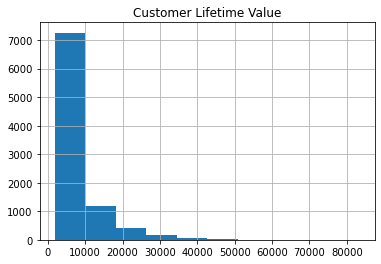

In [29]:
#to see the CLV data 

data.hist('Customer Lifetime Value', bins = 10)
plt.show()

In [30]:
#Chech the skewness, if p < 0.05 it is skewed
clv = data['Customer Lifetime Value']
from scipy.stats import shapiro
shapiro(clv)[1]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

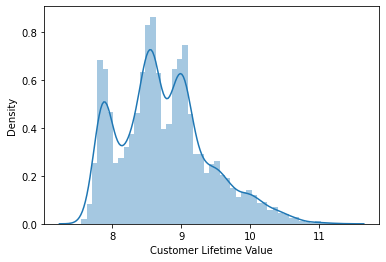

In [31]:
#as this does not work, let's continue with the log function
log_clv = np.log(clv)
import seaborn as sns
sns.distplot(log_clv)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

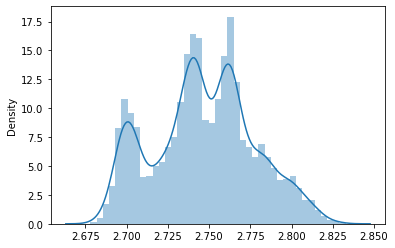

In [32]:
#it is slightly improved regarding the skewness. Let's try Box Cox now
from scipy.stats import boxcox
boxcox_clv = boxcox(clv)[0]
sns.distplot(boxcox_clv)

In [33]:
#I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_5,boxcox_clv, test_size=0.3 , random_state = 25)

In [34]:
model_5.fit(X_train, y_train)

LinearRegression()

In [35]:
Predictions_box = model_5.predict(X_test)
print_metrics(y_test, Predictions_box, 5)

Mean Square Error      = 0.0007427920607688169
Root Mean Square Error = 0.02725421179870768
Mean Absolute Error    = 0.022444205666337633
Median Absolute Error  = 0.023685861232976002
R^2                    = 0.1859435941172174
Adjusted R^2           = 0.1847534531729443
